## Libraries and setup

In [1]:
# Import libraries
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from pandas.api.types import CategoricalDtype

%matplotlib inline

sns.set()

In [2]:
# List of periods
periods = {
    '60': '1m',  # 1 Minute
    '180': '3m', # 3 Minutes
    '300': '5m',
    '900': '15m',
    '1800': '30m',
    '3600': '1h', # 1 Hour
    '7200': '2h',
    '14400': '4h',
    '21600': '6h',
    '43200': '12h',
    '86400': '1d', # 1 Day
    '259200': '3d',
    '604800': '1w', # 1 Week
}

### Access Kraken BTC/USD summary

In [3]:
kraken_url = 'https://api.cryptowat.ch/markets/kraken/btcusd/summary'
resp = requests.get(kraken_url)
resp.json()

{'result': {'price': {'last': 7101.5,
   'high': 7165,
   'low': 6771.9,
   'change': {'percentage': 0.0284725339975959, 'absolute': 196.6}},
  'volume': 6164.03161384,
  'volumeQuote': 43154599.53322976},
 'allowance': {'cost': 624473,
  'remaining': 3999375527,
  'remainingPaid': 0,
  'upgrade': 'Upgrade for a higher allowance, starting at $15/month for 16 seconds/hour. https://cryptowat.ch/pricing'}}

### Import 1-week and 1-day period data

In [4]:
# Get historic data from OHLC (open high low close)
kraken_data_url = 'https://api.cryptowat.ch/markets/kraken/btcusd/ohlc'

# Looking at 1 week periods
week = '604800'
params = {'periods': week}

# Access API and request 1 week periods
resp = requests.get(kraken_data_url, params)
resp.ok

True

In [5]:
# convert json to python data
data = resp.json()

# create a data frame 
week_df = pd.DataFrame(
    data['result'][week], 
    columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

# drop NA column
week_df.drop(columns=['NA'], inplace=True)

# Create Date column as the datetime equivalent of CloseTime
week_df['Date'] = pd.to_datetime(week_df['CloseTime'], unit='s')

# Make Date column the index
week_df.set_index(week_df['Date'], inplace=True)

# Data preview
week_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date
Date,,,,,,,
2013-10-17,1381968000,125.85000,153.00000,125.8500,138.09000,42.634753,2013-10-17
2013-10-24,1382572800,138.09000,203.45000,137.5200,203.45000,171.619985,2013-10-24
2013-10-31,1383177600,203.45000,207.30246,169.9201,203.77000,242.176755,2013-10-31
2013-11-07,1383782400,203.77000,269.42566,199.0000,263.73672,198.738897,2013-11-07
2013-11-14,1384387200,263.73672,500.00000,262.8628,398.00000,194.705865,2013-11-14


In [6]:
# Import kraken data with days as period
day = '86400'
day_params = {'periods': day}
resp = requests.get(kraken_data_url, day_params)
resp.ok

True

In [7]:
data = resp.json()

# Dataframe with daily data
day_df = pd.DataFrame(data['result'][day], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

# Clean the df
day_df.drop(columns=['NA'], inplace=True)
day_df['Date'] = pd.to_datetime(day_df['CloseTime'], unit='s')
day_df.set_index('Date', inplace=True)

day_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
Date,,,,,,
2013-10-08,1381190400,123.61,123.61000,123.61,123.61,0.1000
2013-10-09,1381276800,123.61,124.19000,123.90,124.18,3.9916
2013-10-10,1381363200,124.18,124.01687,123.84,123.84,2.8230
2013-10-11,1381449600,123.84,125.86000,125.85,125.86,2.0000
2013-10-13,1381622400,125.86,127.50000,127.00,127.00,4.0000


### Plot weekly close price against daily close price

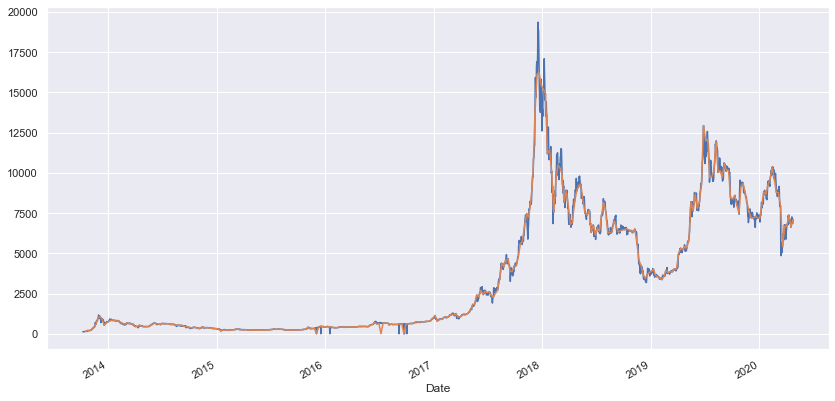

In [8]:
day_df['ClosePrice'].plot(figsize=(14,7))
week_df['ClosePrice'].plot(figsize=(14,7))

### Mean daily close price

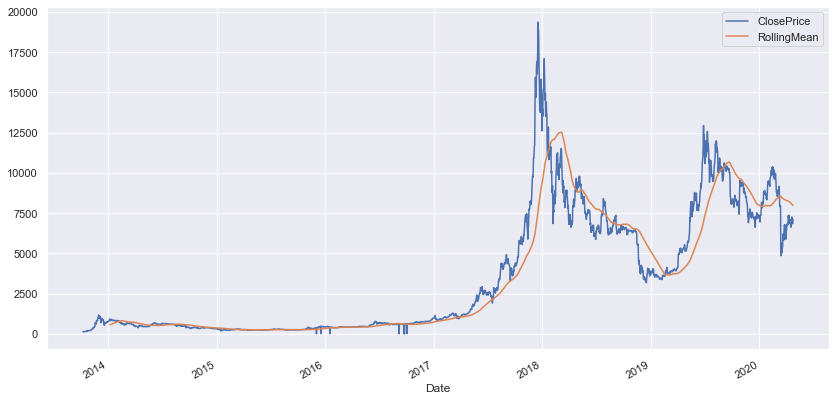

In [9]:
# Make a copy of day_df with only ClosePrice
daily_price = day_df[['ClosePrice']].copy()

# Calculate rolling 90-day mean
daily_price['RollingMean'] = daily_price['ClosePrice'].rolling(90).mean()
daily_price[95:99]

# Plot
daily_price.plot(figsize=(14,7))

## Price of BTC/USD By Day of Week

### Calculate Highest High and Lowest Low By Day Of Week

Question to answer: 
- which day of the week has the highest high?
- which day has the lowest low?


To do:
- From data frame of prices by day, group by day of week
- Plot the highs, lows, and close of each day 
- Separate plots by year because prices have changed dramatically over time

### Import raw data

In [33]:
# Import kraken data with days as period
day = '86400'
day_params = {'periods': day}
resp = requests.get(kraken_data_url, day_params)
resp.ok
data = resp.json()

# Dataframe with day data
day_df = pd.DataFrame(data['result'][day], columns=
    ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])

# Remove unused column and create new datetime column
day_df.drop(columns=['NA'], inplace=True)
day_df['Date'] = pd.to_datetime(day_df['CloseTime'], unit='s')

# Create day of week column
day_df['DayOfWeek'] = day_df['Date'].dt.day_name()

# Index datetime
day_df['datetime'] = pd.to_datetime(day_df['CloseTime'], unit='s')
day_df = day_df.set_index('datetime')

day_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date,DayOfWeek
datetime,,,,,,,,
2013-10-08,1381190400,123.61,123.61000,123.61,123.61,0.1000,2013-10-08,Tuesday
2013-10-09,1381276800,123.61,124.19000,123.90,124.18,3.9916,2013-10-09,Wednesday
2013-10-10,1381363200,124.18,124.01687,123.84,123.84,2.8230,2013-10-10,Thursday
2013-10-11,1381449600,123.84,125.86000,125.85,125.86,2.0000,2013-10-11,Friday
2013-10-13,1381622400,125.86,127.50000,127.00,127.00,4.0000,2013-10-13,Sunday


### Data Management

In [35]:
# Add day, weekly, yearly data to columns
day_df['day'] = day_df.index.day
day_df['week'] = day_df.index.week
day_df['year'] = day_df.index.year
day_df['hour'] = day_df.index.hour

# Sort days of the week with an ordered categorical datatype
day_cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cat_type = CategoricalDtype(categories=day_cats, ordered=True)

# Apply sort
day_df['DayOfWeek'] = day_df['DayOfWeek'].astype(cat_type)

day_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date,DayOfWeek,day,week,year,hour
datetime,,,,,,,,,,,,
2013-10-08,1381190400,123.61,123.61000,123.61,123.61,0.1000,2013-10-08,Tuesday,8,41,2013,0
2013-10-09,1381276800,123.61,124.19000,123.90,124.18,3.9916,2013-10-09,Wednesday,9,41,2013,0
2013-10-10,1381363200,124.18,124.01687,123.84,123.84,2.8230,2013-10-10,Thursday,10,41,2013,0
2013-10-11,1381449600,123.84,125.86000,125.85,125.86,2.0000,2013-10-11,Friday,11,41,2013,0
2013-10-13,1381622400,125.86,127.50000,127.00,127.00,4.0000,2013-10-13,Sunday,13,41,2013,0


### Daily Close Price in 2020

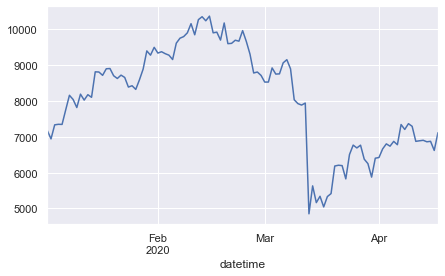

In [36]:
# Rolling average over the course of 2020
start_date = '01-01-2020'
end_date = '4-17-2020'
mask = (day_df['Date'] > start_date) & (day_df['Date'] <= end_date)

# Filter using our mask
day_2020_df = day_df.loc[mask]

# Look at only the mean per day of the week in 2020
#days2020_grouped = day_2020.groupby('DayOfWeek')['ClosePrice'].mean()

day_2020_df['ClosePrice'].plot(figsize=(7,4))

### All price data over time

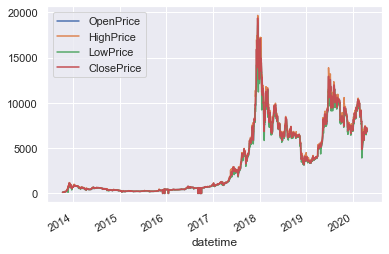

In [37]:
# Plot the data!
day_df[['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice']].plot()

### Price by day Of week, separated by year

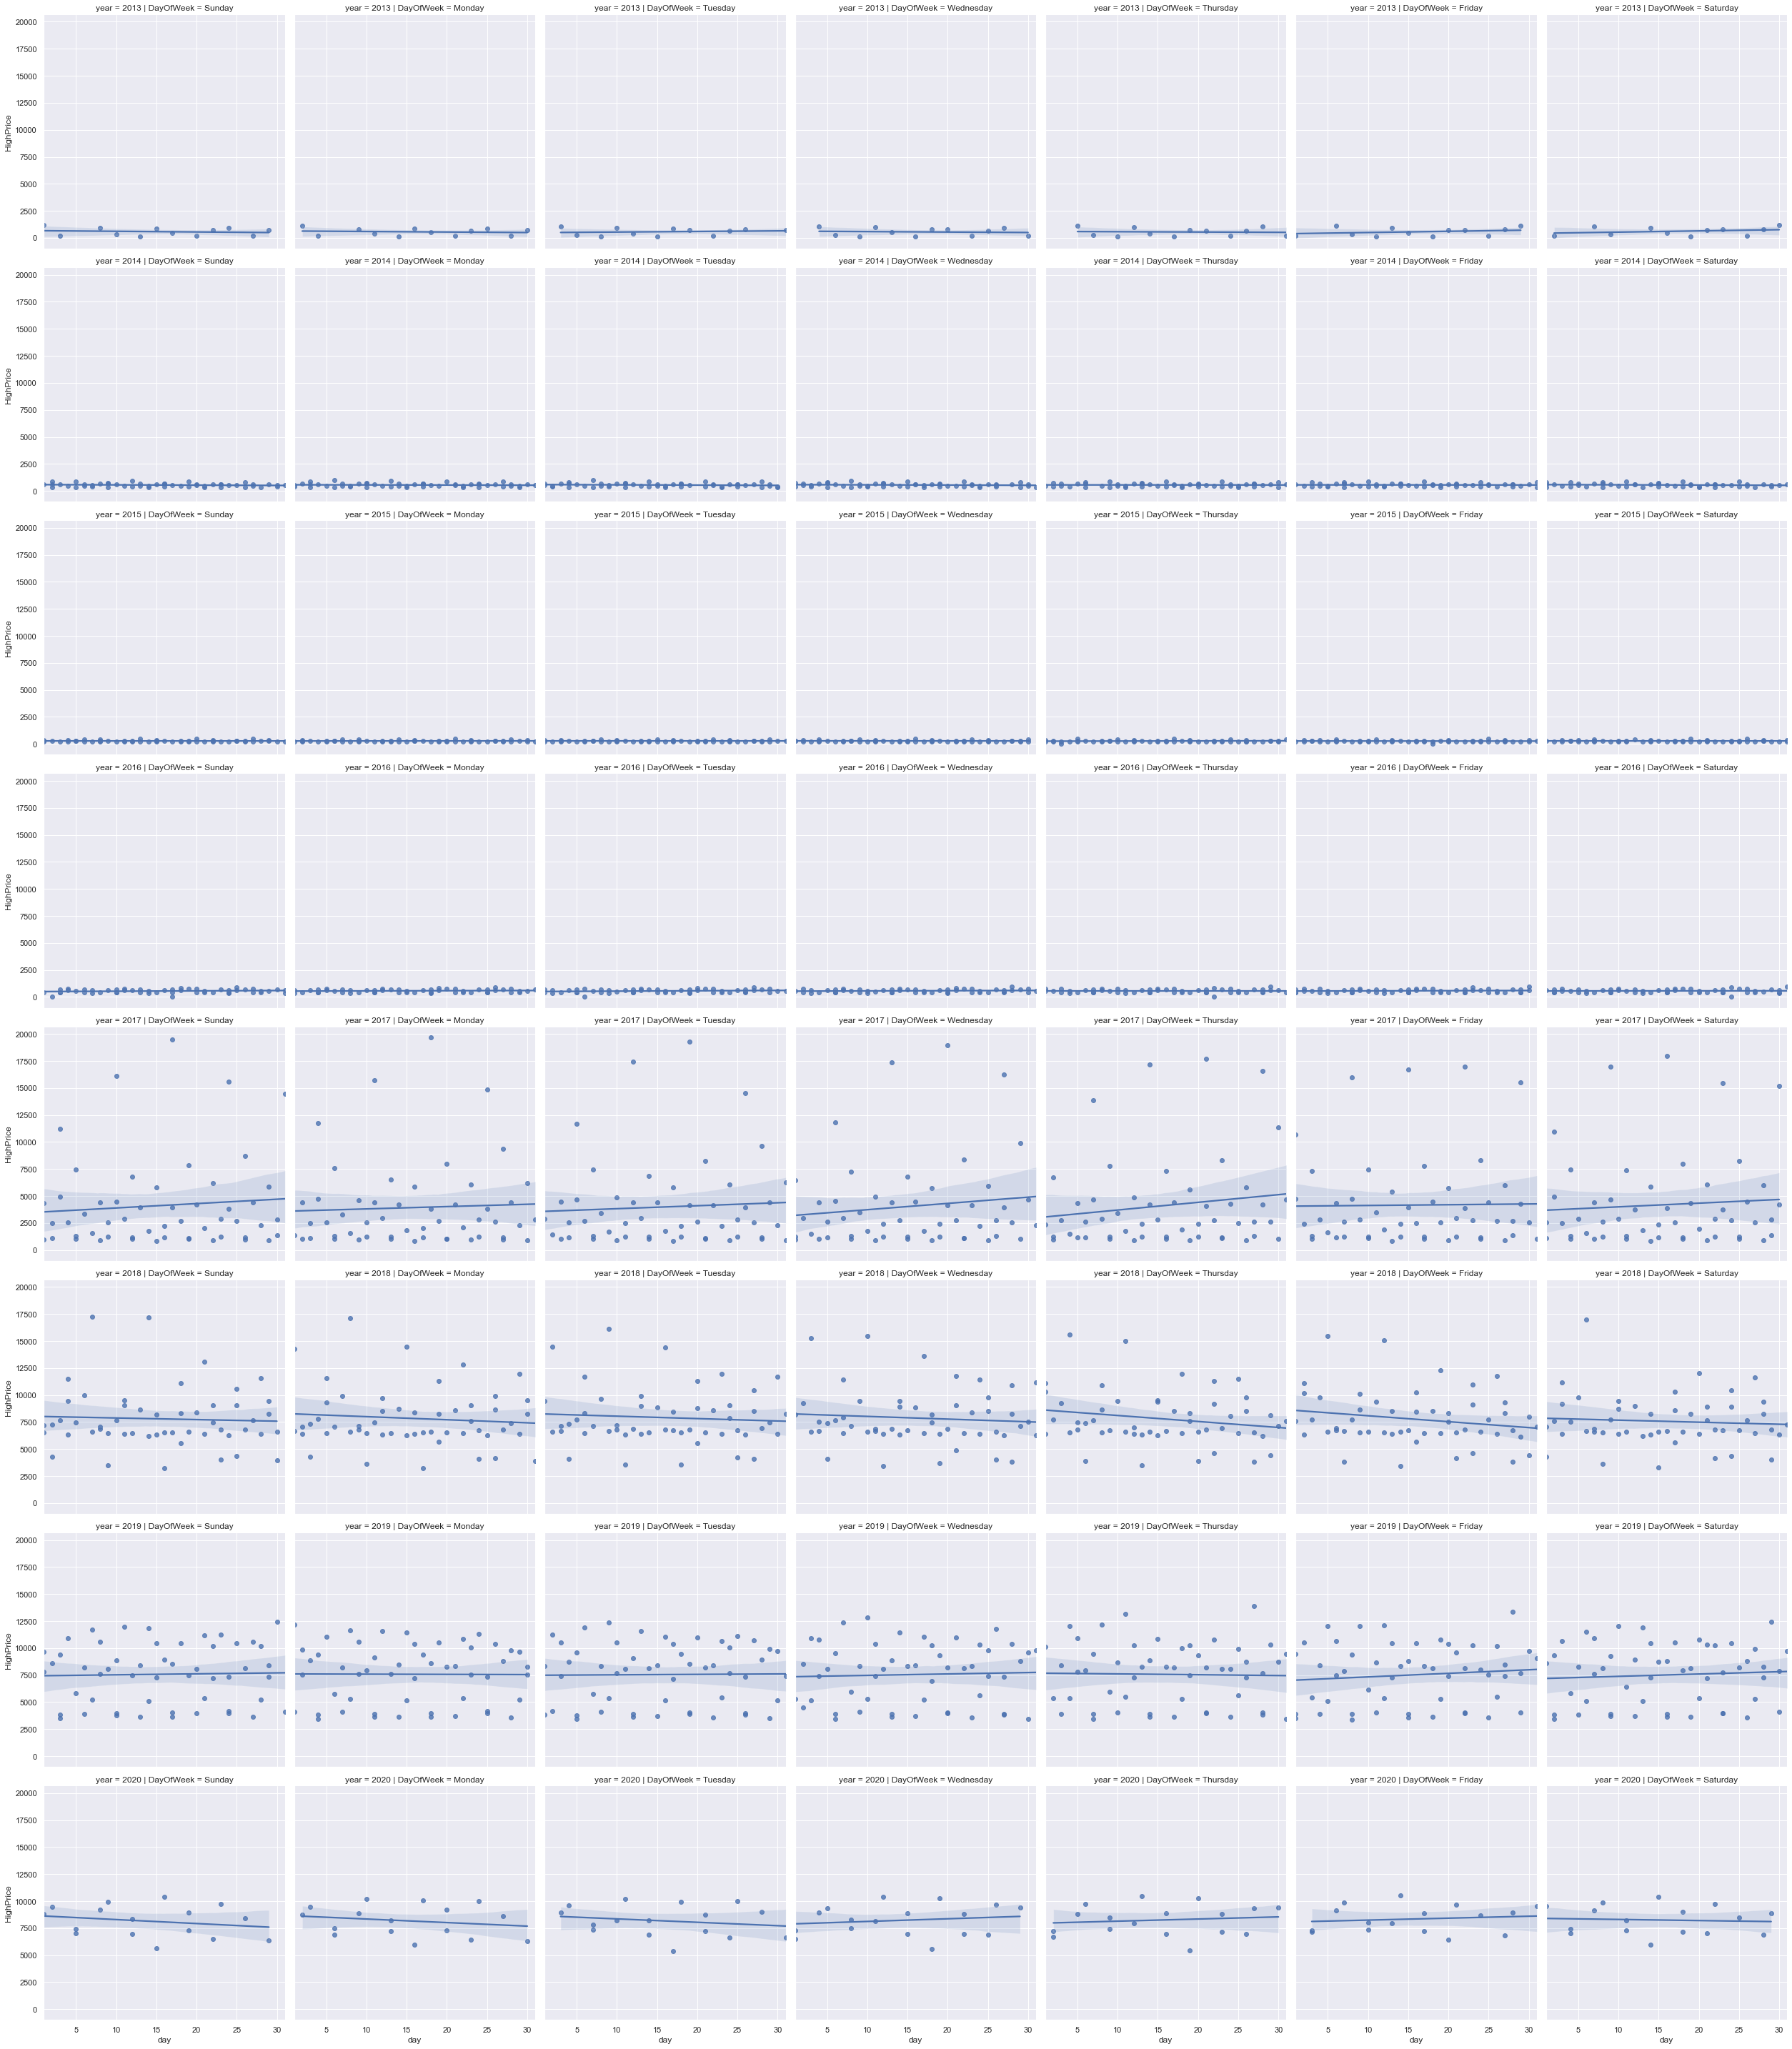

In [42]:
# Group by day of week, then group by year
groupsday = day_df[['year','DayOfWeek','OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice']].groupby('DayOfWeek').rolling(7).mean()

# Group by Year, over time
groups1 = groupsday[['year','OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice']].groupby('year').rolling(1).mean()

# Now, facet the plot by year
g = sns.lmplot(data=day_df, x='day', y='HighPrice', row='year', col='DayOfWeek')

## Make dataset longform

- Columns:
    - datetime index
    - price
    - pricetype =(high, low, open, or close)
    - datetime sorting = (year, day, dayofweek, hour)
- Rows:
    - Each row is a single price point for that index
- Then can group by pricetype, and date subdivision

In [43]:
day_df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Date,DayOfWeek,day,week,year,hour
datetime,,,,,,,,,,,,
2013-10-08,1381190400,123.61,123.61000,123.61,123.61,0.1000,2013-10-08,Tuesday,8,41,2013,0
2013-10-09,1381276800,123.61,124.19000,123.90,124.18,3.9916,2013-10-09,Wednesday,9,41,2013,0
2013-10-10,1381363200,124.18,124.01687,123.84,123.84,2.8230,2013-10-10,Thursday,10,41,2013,0
2013-10-11,1381449600,123.84,125.86000,125.85,125.86,2.0000,2013-10-11,Friday,11,41,2013,0
2013-10-13,1381622400,125.86,127.50000,127.00,127.00,4.0000,2013-10-13,Sunday,13,41,2013,0


In [108]:
# Melt dataframe into long format
long_day = pd.melt(day_df, id_vars=['CloseTime'], value_vars=[
    'OpenPrice', 'ClosePrice', 'HighPrice', 'LowPrice'], var_name = 'Type', value_name= 'Price')

long_day['datetime'] = pd.to_datetime(long_day['CloseTime'], unit='s')
long_day.set_index(long_day['datetime'], inplace=True)

long_day.head()

,CloseTime,Type,Price,datetime
datetime,,,,
2013-10-08,1381190400,OpenPrice,123.61,2013-10-08
2013-10-09,1381276800,OpenPrice,123.61,2013-10-09
2013-10-10,1381363200,OpenPrice,124.18,2013-10-10
2013-10-11,1381449600,OpenPrice,123.84,2013-10-11
2013-10-13,1381622400,OpenPrice,125.86,2013-10-13


In [109]:
long_day['Year'] = long_day.index.year
long_day['Day'] = long_day.index.day

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

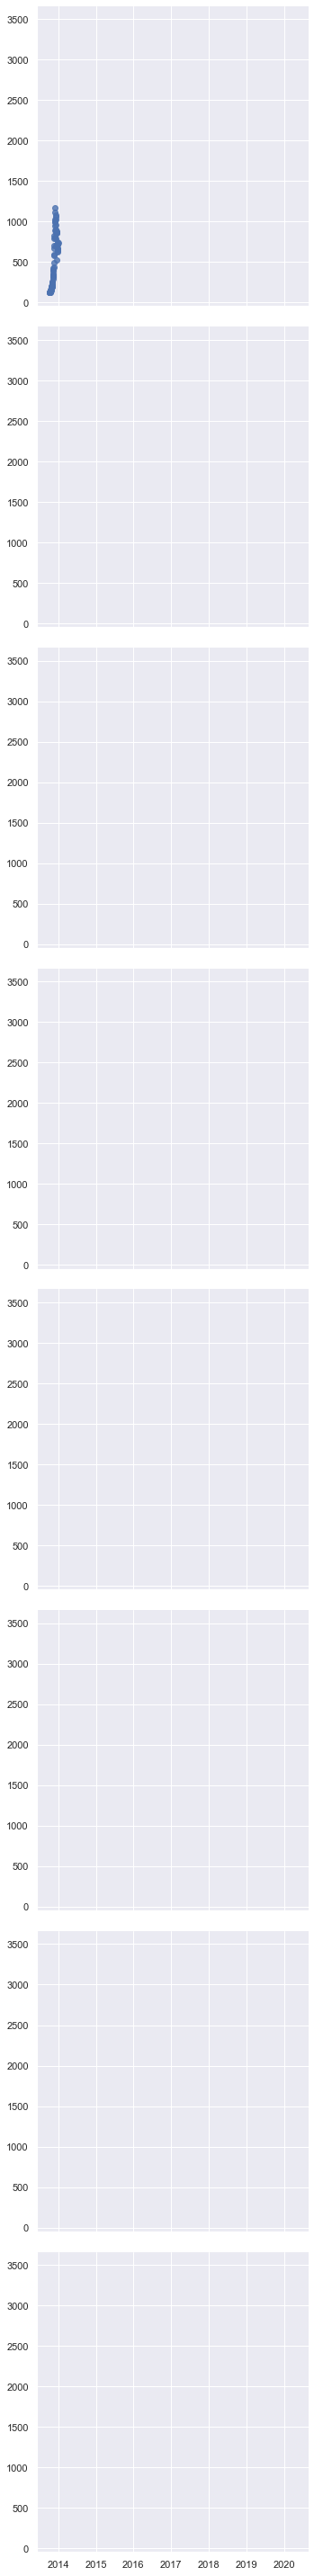

In [111]:
plot1 = sns.lmplot(data=long_day, x='datetime', y='Price', row='Year', hue='Type')

,Date,DayOfWeek,day,year,Type,Price
0,2013-10-08,Tuesday,8,2013,OpenPrice,123.61000
1,2013-10-09,Wednesday,9,2013,OpenPrice,123.61000
2,2013-10-10,Thursday,10,2013,OpenPrice,124.18000
3,2013-10-11,Friday,11,2013,OpenPrice,123.84000
4,2013-10-13,Sunday,13,2013,OpenPrice,125.86000
2376,2013-10-08,Tuesday,8,2013,ClosePrice,123.61000
2377,2013-10-09,Wednesday,9,2013,ClosePrice,124.18000
2378,2013-10-10,Thursday,10,2013,ClosePrice,123.84000
2379,2013-10-11,Friday,11,2013,ClosePrice,125.86000
2380,2013-10-13,Sunday,13,2013,ClosePrice,127.00000
